In [4]:
from arviz import hdi
import pyabc
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix2
import scipy
import numpy as np
from pyabc.visualization import plot_kde_matrix_highlevel
from datetime import datetime
import pandas as pd
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix
import matplotlib.pyplot as plt
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix, plot_kde_2d

path = '../../results'
output_path = '../../figures'

file_name = 'basic-prior'

history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,file_name))
history.get_all_populations()

,t,population_end_time,samples,epsilon,particles
0,-1,2021-12-29 04:47:34.853143,200,inf,1
1,0,2021-12-29 10:54:43.770932,393,0.746575,200
2,1,2021-12-29 11:53:27.456808,4967,0.360622,836
3,2,2021-12-29 13:38:29.537354,9109,0.197467,1059
4,3,2021-12-29 16:37:20.673694,16125,0.145762,1111
5,4,2021-12-29 21:50:47.240188,27629,0.131083,964
6,5,2021-12-30 08:00:52.829615,53803,0.126588,982


In [5]:
def MAP(f):
    history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path, f))
    samples, weights = history.get_distribution(m=0, t=None)
    columns = list(samples.columns)
    kde = scipy.stats.gaussian_kde(samples.T.values.tolist(), weights=weights)
    size = 50000
    samples = kde.resample(size).T
    samples = pd.DataFrame(data=samples,columns=columns)
    MAP = scipy.optimize.minimize(lambda x: -kde.logpdf(x) ,samples.median().values)['x']
    return MAP

In [7]:
# for every one the mutation rate and trisomy priors were:
# (p1_mr=pyabc.RV("uniform", 10.0**-9, 10.0**-5-10.0**-9)
#  p2_tr=pyabc.RV("uniform", 10.0**-6, 10.0**-2-10.0**-6)
k1 = 'basic-prior'
k2 = 'tau2' 
k103125 = 'tau3332'
k5 = 'tau5' 
k10 = 'tau10'
k100 = 'tau100'

allf = [k1, k103125, k2, k5, k10, k100]
labels = ['$𝜏=1$','$𝜏=33/32$','$𝜏=2$','$𝜏=5$','$𝜏=10$','$𝜏=100$']
print('checking termination epsilon for each run')
for i in allf:
    history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path, i))
    print(i, round(history.get_all_populations()['epsilon'].values[-1],5))

checking termination epsilon for each run
basic-prior 0.12659
tau3332 0.12827
tau2 0.12688
tau5 0.1277
tau10 0.12719
tau100 0.13082


INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral


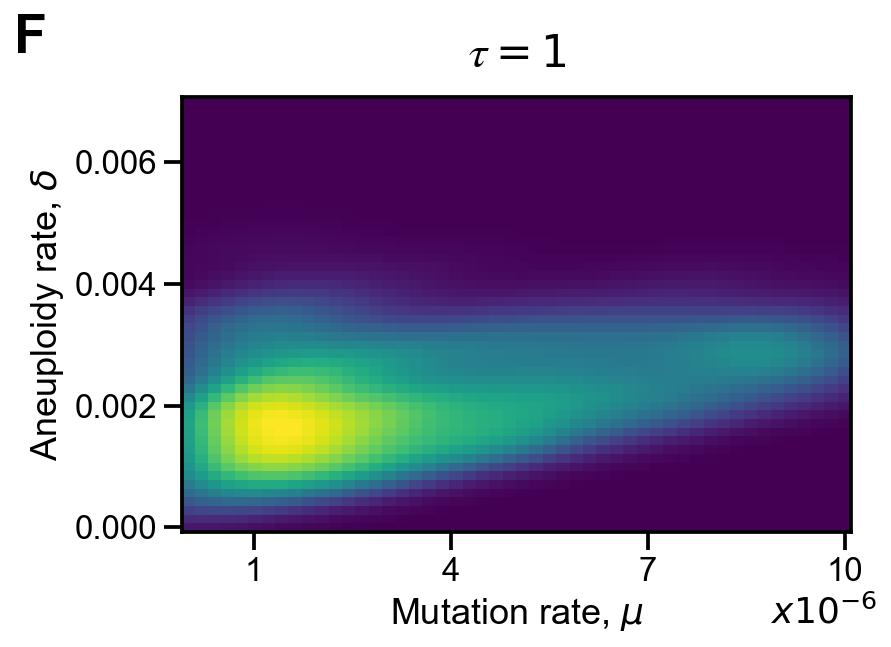

INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral


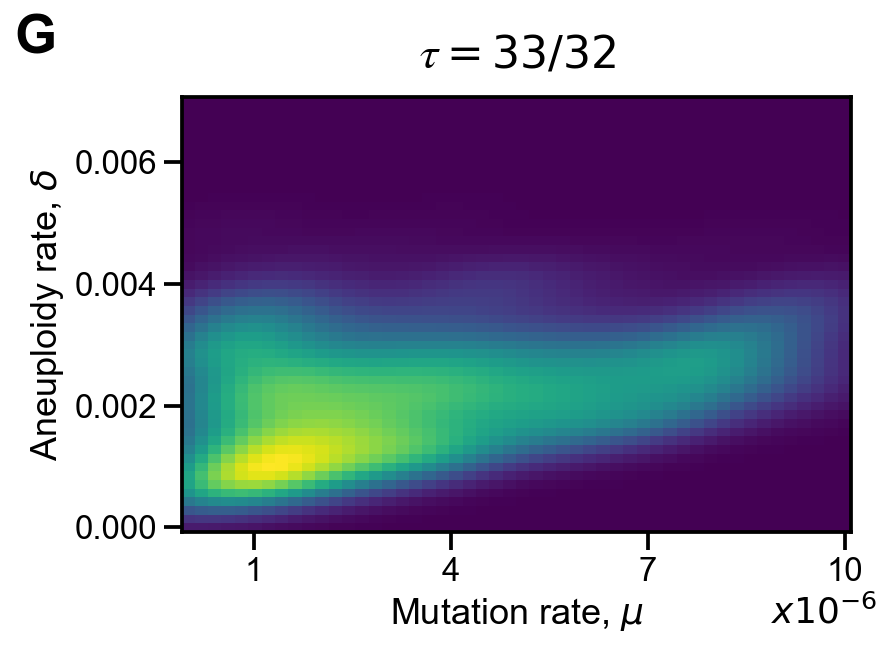

INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral


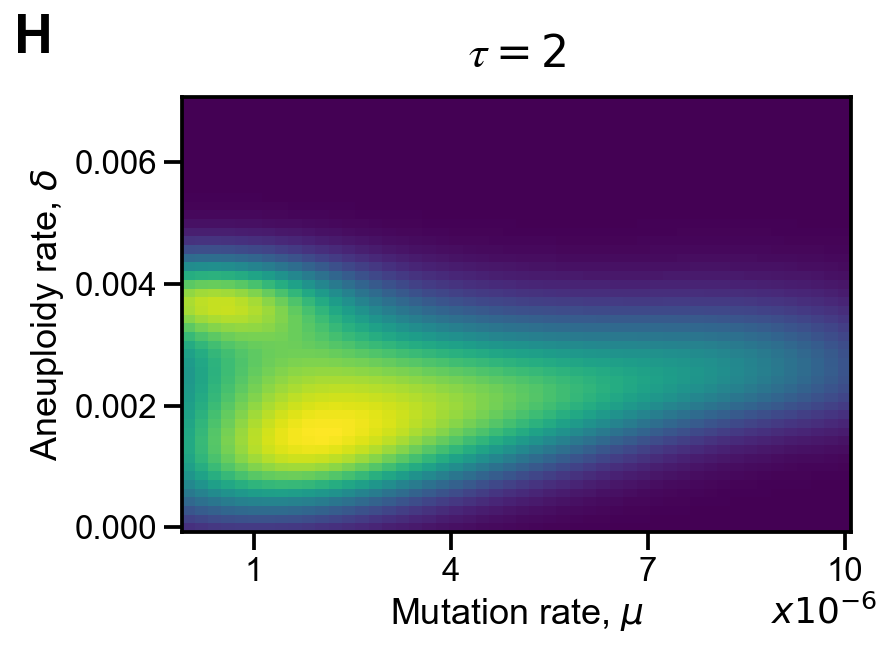

INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral


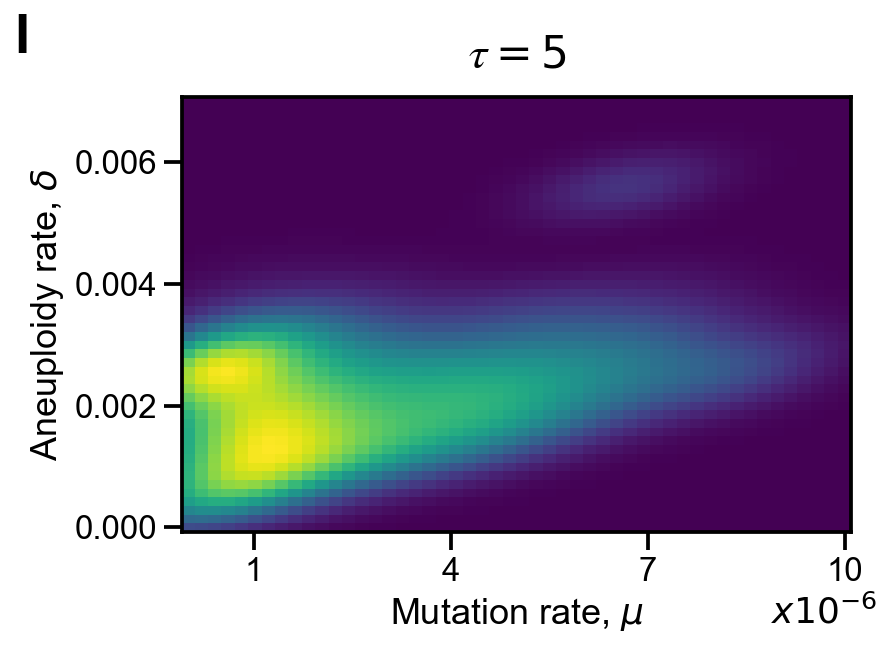

INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral


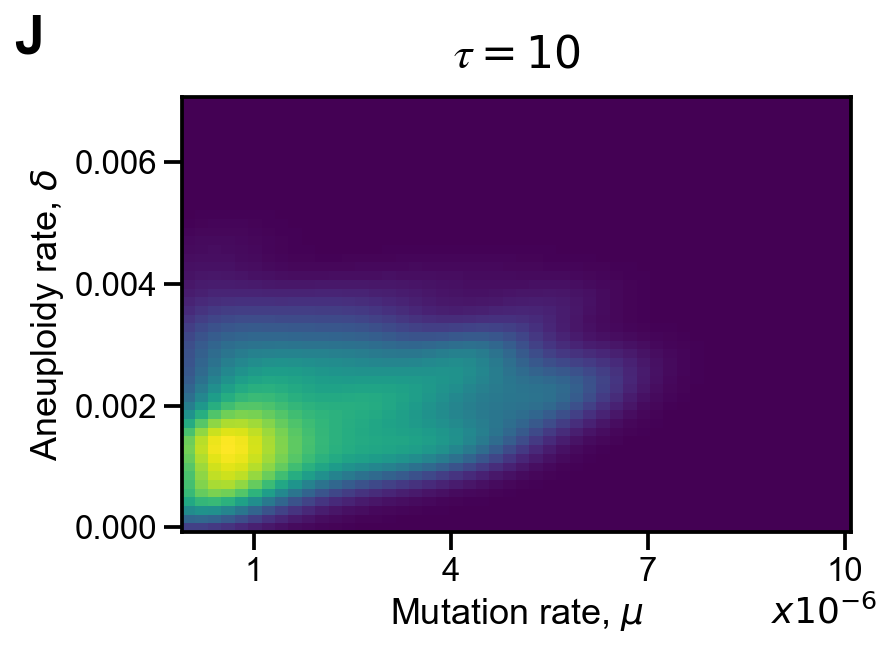

INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral


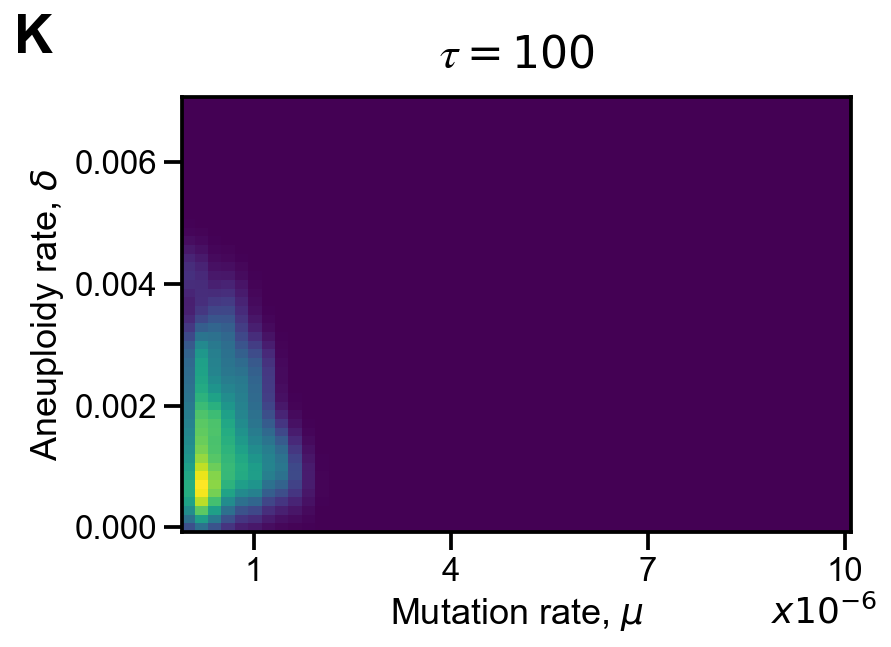

In [8]:
import seaborn as sns
# sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 1.2, 'lines.markersize': 7})
# sns.color_palette("Set2")
sns.set_context('talk')
plt.rcParams['font.sans-serif'] = ['Arial']
import string
# print(sns.axes_style())
# return

lims_mr = (10.0**-9,10.0**-5)
lims_ar = (10.0**-6,10.0**-2)
lims_ar = (10.0**-6,0.007)


i=4
for f, l in zip(allf, labels):
    i+=1
    fig, ax = plt.subplots()

    history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,f))

    s,w = history.get_distribution(m=0, t=None)
    plot_kde_2d(s,w, 'p1_mr', 'p2_tr' ,xmin=lims_mr[0], xmax=lims_mr[1], 
                ymin=lims_ar[0], ymax=lims_ar[1], colorbar=False, ax=ax)
    plt.xlabel("Mutation rate, $\mu$");
    plt.ylabel("Aneuploidy rate, $\delta$");
    plt.title(l, fontsize=22, y=1.04)
    ax.text(-0.25, 1.1, string.ascii_uppercase[i], transform=ax.transAxes, size=27, weight='bold')
    ax.ticklabel_format(style='plain')
    ax.text(0.88, -0.21, '$x10^{-6}$', transform=ax.transAxes)
    ax.set_xticks([1e-6, 4e-6, 7e-6, 10e-6])
    ax.set_xticklabels([int(a) for a in ax.get_xticks()*1e6]);
#     plt.gcf().savefig(f'{output_path}/tau-joint-{string.ascii_uppercase[i]}.pdf', bbox_inches='tight', dpi=100)


INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜏 from STIXGeneral
INFO:matplotlib.mathtext:Substituting sy

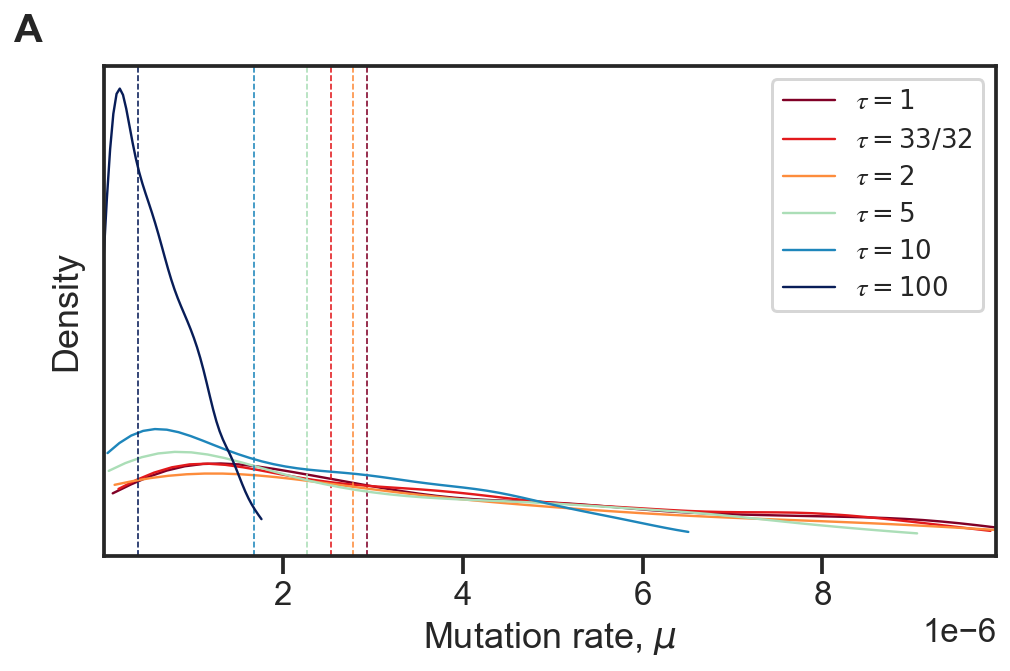

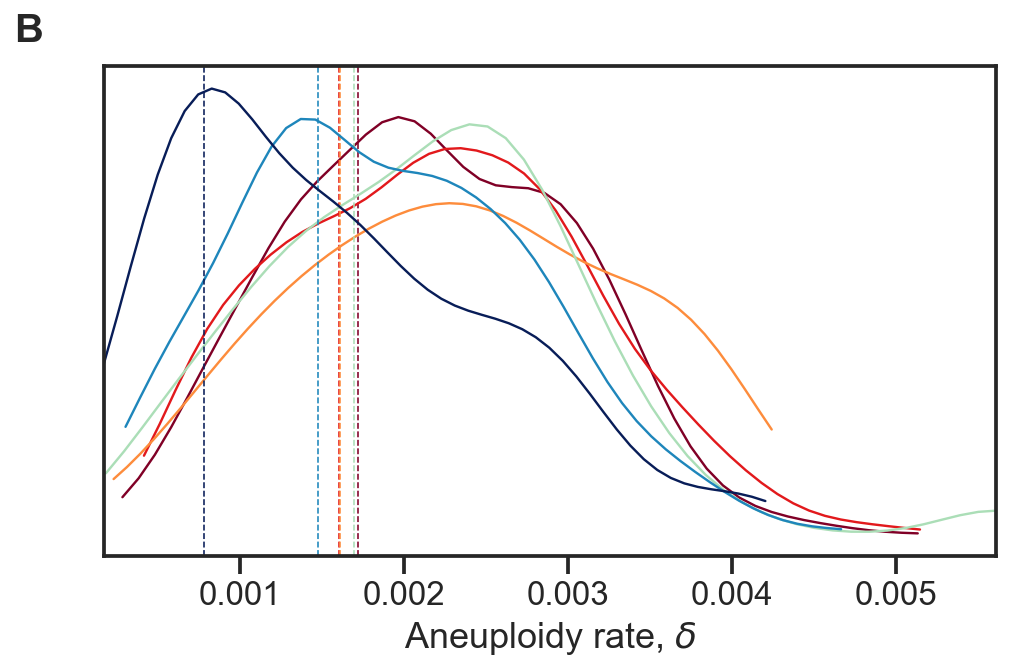

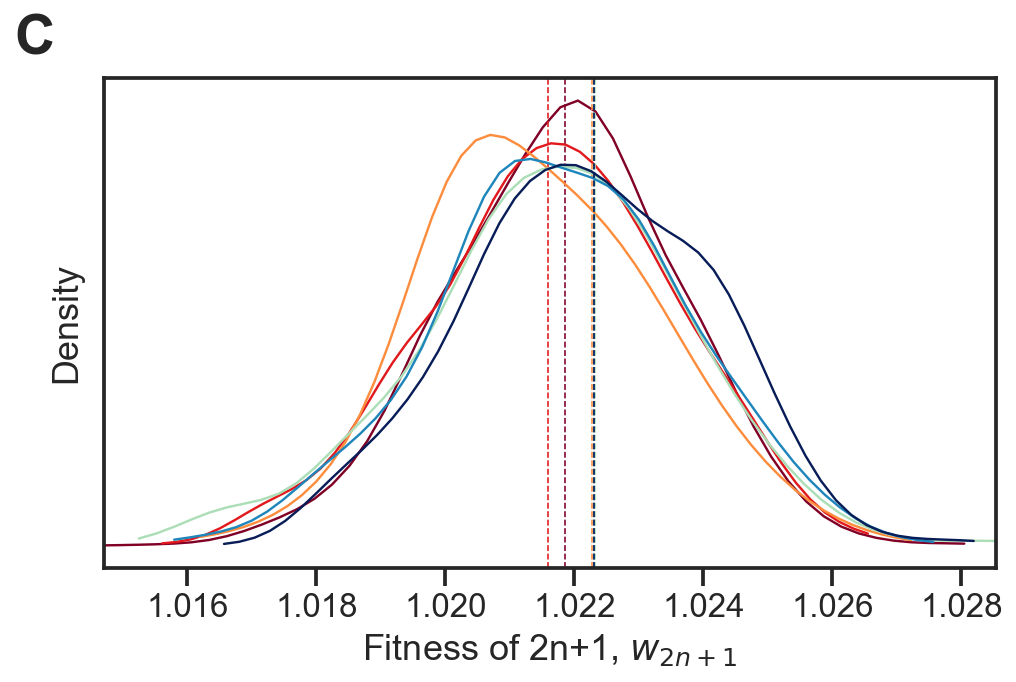

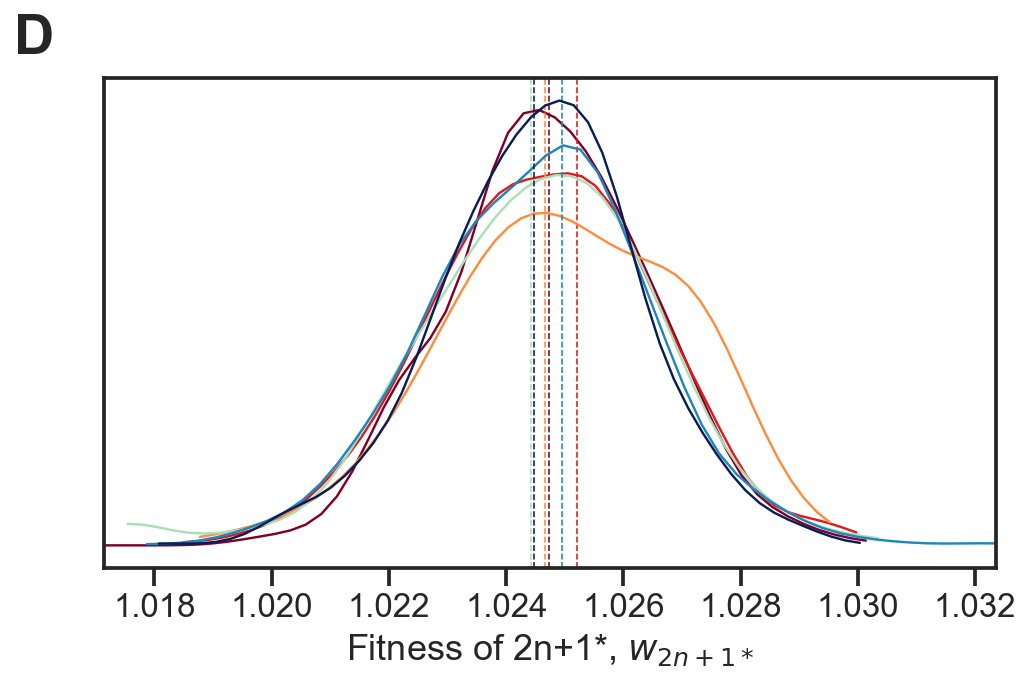

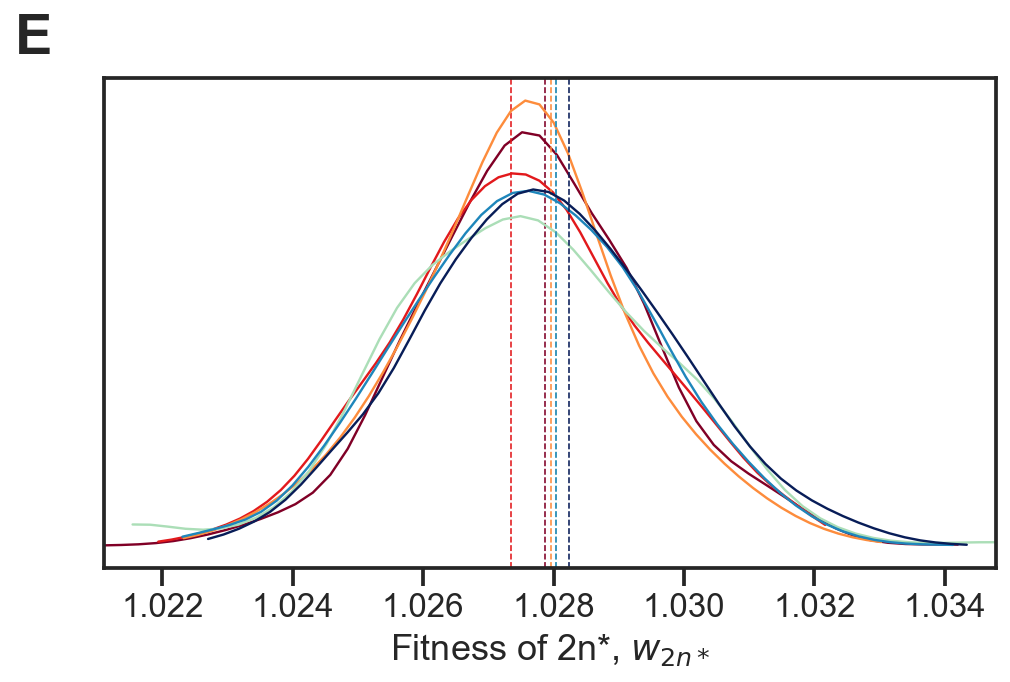

In [53]:
import seaborn as sns
sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 1.2, 'lines.markersize': 7})
from matplotlib import cm
import string

def compare(files, p, c, i, labels, ax):
    cm_subsection = np.linspace(0, 1.0, len(labels)) 
    colors = [0]*6
    colors[0:2] = reversed([ cm.YlOrRd(x) for x in np.linspace(0.5, 1.0, 3)])
    colors[3:] = [ cm.YlGnBu(x) for x in np.linspace(0.3, 1, 3)]
#     colors.reverse()
    colors
#     cm_subsection = linspace(0.2, 0.8, len(labels)) 
#     colors = [cm.hsv(0.2),cm.hsv(0.4),cm.hsv(0.5), 'blue', 'blue', cm.hsv(0.8)]
#     colors[-2] = colors[-3] = 'blue'
#     linestyles = ['solid']*len(labels)
#     linestyles[-2] = 'dashed'
    xmin = 1000
    xmax = -1000
    for f ,l, color in zip(files,labels,colors):
        history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,f))
        df, w = history.get_distribution(m=0, t=None)
        xmin = min(xmin, min(df[p]))
        xmax = max(xmax, max(df[p]))
        pyabc.visualization.plot_kde_1d(
            df,
            w,
            x=p,
            xname=c,
            ax=ax,
            label=f"{l}",
            color=color,
        )
        mapp = MAP(f)[i]
        ax.axvline(mapp, color=color, linewidth=0.8, linestyle='--')
    ax.set_xlim(xmin, xmax)

        
history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,k1))
samples, weights = history.get_distribution(m=0, t=None)
c = ['Mutation rate, $\mu$', 'Aneuploidy rate, $\delta$', 'Fitness of 2n+1, $w_{2n+1}$', 
     'Fitness of 2n+1*, $w_{2n+1*}$', 'Fitness of 2n*, $w_{2n*}$']
p_to_c = {p:c for p,c in zip(list(samples.columns),c)} #param name of samples to column name that should be shown

i=-1
allf = [k1, k103125, k2, k5, k10, k100]
labels = ['$𝜏=1$','$𝜏=33/32$','$𝜏=2$','$𝜏=5$','$𝜏=10$','$𝜏=100$']

for p in samples.columns.values:
    i+=1
    fig, ax = plt.subplots(figsize=(8,4.5))
    compare(allf, p, p_to_c[p],i, labels, ax)
    ax.text(-0.1, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20 if i<2 else 28, weight='bold')
    ax.set_ylabel("Density" if i==0 or i==2 else "",labelpad=10)
    ax.axes.yaxis.set_ticks([])
    if i==0:
        ax.legend(bbox_to_anchor=(1, 1),loc='upper right',fontsize=13);
    plt.gcf().savefig(f'{output_path}/tau-{string.ascii_uppercase[i]}.pdf', bbox_inches='tight', dpi=100)